<a href="https://colab.research.google.com/github/tusharpoddar/e-Science-Research/blob/master/GoogleDrive/Netcdf_to_numpy(rand).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following class is used to prepare a numpy file that can be used for training later. 

## The following notebook does the following things - 
1. The notebook asks the user the specify the dataset as a CSV file that needs to be converted into a numpy array that can be used by the VGGish model. 

2. The notebook then gives an example of how to open the netcdf files that the CSV file specify in the form of animal number, experiment number, etc. 

3. The notebook then gives you an option to store all the data for the NetCDF file to a numpy array that can be easily handled. 

4. The notebook also stores the mice and the random noise separately. This was done so that we could plot the offset plot with both the spectrograms data anh see if the mice sounds cluster around themseleves or not. Results for that file can be found in Cluster-plot-netcdf-file colab notebook. 

# Conclusion - 
The notebook can be used for variuos things - 
1. Prepare the data for training. 
2. Prepare separate data files for different classes. 
3. See how to change the shape of the data so that it can be used by the VGGis model. 



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pip install netcdf4

     |████████████████████████████████| 4.3MB 2.8MB/s 
     |████████████████████████████████| 296kB 36.4MB/s 


In [ ]:
cd /content/gdrive/Shared drives/USV_eScience_Incubator

/content/gdrive/Shared drives/USV_eScience_Incubator


In [ ]:
import pandas as pd

In [ ]:
path = '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/feature_data_frames/Old/annot_8features_100noise_fear.csv'

In [ ]:
annot = pd.read_csv(path)

In [ ]:
annot = pd.DataFrame(data = annot)
print(annot)
print(annot.Annotation.value_counts())

      Unnamed: 0  animal_number   session  ...  spec_kurt spec_slope     spec_roll
0              0            533   CPApair  ...  26.730238   0.000149  38781.012731
1              1            533   CPApair  ...  50.458618  -0.000471  37262.344520
2              2            533   CPApair  ...  35.797254  -0.001451  14898.363521
3              3            533   CPApair  ...  25.973715  -0.000857  24369.181905
4              4            533   CPApair  ...   4.124133  -0.001831  19606.292614
...          ...            ...       ...  ...        ...        ...           ...
1754        1595            557  cagepair  ...   0.945694  -0.000005  26382.647835
1755        1596            557  cagepair  ...   1.348464  -0.000287  24299.949586
1756        1597            557  cagepair  ...   5.296944  -0.001228  19409.636199
1757        1598            557  cagepair  ...   0.873569   0.000367  29020.685860
1758        1599            557  cagepair  ...   1.744215  -0.000575  26036.829758

[17

In [ ]:
import numpy as np

In [ ]:
annot_np = np.array(annot)

In [ ]:
annot_np.shape

(1759, 13)

In [ ]:
print(annot_np)

[[0 533 'CPApair' ... 26.730237909129265 0.0001492212612946439
  38781.01273105976]
 [1 533 'CPApair' ... 50.458617520662784 -0.0004710670620987905
  37262.34451977568]
 [2 533 'CPApair' ... 35.79725413806569 -0.0014514982021349824
  14898.363521175415]
 ...
 [1597 557 'cagepair' ... 5.296944101949785 -0.001228450436117667
  19409.63619929344]
 [1598 557 'cagepair' ... 0.8735693905835058 0.00036655365295798606
  29020.685859995865]
 [1599 557 'cagepair' ... 1.7442150248201536 -0.0005754111357627867
  26036.829757815205]]


In [ ]:
import xarray as xr

In [ ]:
import cv2

## Just opeing a file to see if things work or not before actually running the loop on the whole dataset.



In [ ]:
# opeing a data file to check if the time stamps exists or not 
path = '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc'
data = xr.open_dataset(path)

In [ ]:
data

<xarray.Dataset>
Dimensions:                        (freq: 257, slices: 26666, times: 55)
Coordinates:
  * freq                           (freq) float64 0.0 488.3 ... 1.25e+05
  * times                          (times) float64 0.000256 0.000704 ... 0.02445
  * slices                         (slices) float64 0.0 22.5 ... 5.999e+05 6e+05
Data variables:
    __xarray_dataarray_variable__  (slices, freq, times) float32 ...

In [ ]:
xr_slice = data['__xarray_dataarray_variable__'].sel(slices=46305.0)

In [ ]:
print(xr_slice)

<xarray.DataArray '__xarray_dataarray_variable__' (freq: 257, times: 55)>
array([[0.011731, 0.015517, 0.001648, ..., 0.006633, 0.050532, 0.004755],
       [0.076805, 0.045599, 0.038084, ..., 0.118308, 0.07835 , 0.095476],
       [0.259311, 0.065708, 0.23181 , ..., 0.324324, 0.031847, 0.291744],
       ...,
       [0.113413, 0.028496, 0.087291, ..., 0.053155, 0.030265, 0.417148],
       [0.042949, 0.048785, 0.106199, ..., 0.046772, 0.012789, 0.218458],
       [0.001644, 0.028889, 0.055271, ..., 0.02005 , 0.014924, 0.059639]],
      dtype=float32)
Coordinates:
  * freq     (freq) float64 0.0 488.3 976.6 ... 1.24e+05 1.245e+05 1.25e+05
  * times    (times) float64 0.000256 0.000704 0.001152 ... 0.024 0.02445
    slices   float64 4.630e+04


## Reading the CSV file and then creating the spectrogram data and the label data for the corresponding spectrograms and then storing them in spcific files. 

In [ ]:
dataWork = []
labelArray = []

In [ ]:
def pathGen(animalNumber, experimentName):
  return '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/' + str(animalNumber)+'_' +str(experimentName) + '_xr_Dataset.nc'

In [ ]:
# reading all the netcdf files that are important to produce the spectrrogram in numpy
for record in annot_np:
  animalNumber = record[1]
  experimentName = record[2]
  time = record[3]
  path = pathGen(animalNumber, experimentName)
  print(path)
  data = xr.open_dataset(path)
  
  print(time)
  xr_slice = data['__xarray_dataarray_variable__'].sel(slices=time)
  temp = np.array(xr_slice)
  # in order to change the shape of the spectrogram so that it matches the format meeded for by the vggish model
  changed = cv2.resize(temp, (64, 96))
  dataWork.append(changed)
  if record[4] == 'rand_noise':
    labelArray.append([0, 1])
  else:
    labelArray.append([1, 0])

In [ ]:
numpyData = np.array(dataWork)
numpyLabel = np.array(laberArray)

In [ ]:
print(numpyData.shape)
print(numpyLabel.shape)

(1759, 96, 64)
(1759, 2)


In [ ]:
savedPathSpectrogram = '/content/gdrive/Shared drives/Research/Data/Numpy files/annot_df_CPApost_round2/fearNoiseSpectrogram.npy'
savedPathLabel = '/content/gdrive/Shared drives/Research/Data/Numpy files/annot_df_CPApost_round2/fearNoiseLabel.npy'
np.save(savedPathSpectrogram, numpyData)
np.save(savedPathLabel, numpyLabel)

## Reading the CSV file and then creating the spectrogram data for the mice sound and the random noise then storing them in spcific files. 

Note - that these generated files cannot be used by the VGGish model as they are not in the desired shape. 

In [ ]:
noise = []
miceSound = []

In [ ]:
# function to produce the noise and the sound separately 
for record in annot_np:
  animalNumber = record[1]
  experimentName = record[2]
  time = record[3]
  path = pathGen(animalNumber, experimentName)
  print(path)
  data = xr.open_dataset(path)
  
  print(time)
  xr_slice = data['__xarray_dataarray_variable__'].sel(slices=time)
  temp = np.array(xr_slice)
  if record[4] == 'rand_noise':
    noise.append(temp)
  else:
    miceSound.append(temp)

/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
46305.0
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
149692.5
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
243157.5
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
295560.0
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
337747.5
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
353745.0
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
376560.0
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/533_CPApair_xr_Dataset.nc
378495.0
/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/Old/Fear/5

In [ ]:
np_noise = np.array(noise)

In [ ]:
np_mice_sound = np.array(miceSound)

In [ ]:
np_noise.shape

(1600, 257, 55)

In [ ]:
np_mice_sound.shape

(159, 257, 55)

In [ ]:
import matplotlib.pyplot as plt

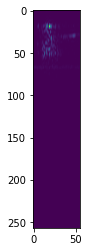

In [ ]:
plt.imshow(np_mice_sound[4, :, :])

In [ ]:
micePath = '/content/gdrive/Shared drives/Research/Data/Numpy files/annot_df_CPApost_round2/miceSound.npy'
noisePath = '/content/gdrive/Shared drives/Research/Data/Numpy files/annot_df_CPApost_round2/noise.npy'
np.save(micePath, np_mice_sound)
np.save(noisePath, np_noise)